# SURUTHI S
# 225229141
# CASCADING BEHAVIOURS IN NETWORK

In [ ]:
pip install colorthief

In [ ]:
import networkx as nx
import pandas as pd
import tqdm
import colorthief
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [ ]:
votes_data = pd.read_excel('/content/drive/MyDrive/ESC2018_GF.xlsx' , sheet_name='Combined result',header = 1)

In [ ]:
votes_data.head(15)

,Rank,Running order,Country,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,...,Hungary,Moldova,Armenia,Czech Republic,Georgia,Montenegro,Azerbaijan,San Marino,Italy,Australia
0,1,22,Israel,529,6,19,8,16,16,10,...,16,22,18,22,15,1,13,24,9,18
1,2,25,Cyprus,436,20,1,15,11,8,0,...,7,13,19,8,10,6,14,7,8,7
2,3,5,Austria,342,2,0,10,15,0,2,...,11,3,7,5,9,0,0,0,7,5
3,4,11,Germany,340,14,16,0,7,3,3,...,1,8,5,3,7,0,5,14,13,12
4,5,26,Italy,308,24,10,4,6,10,15,...,6,8,3,2,5,12,5,12,0,0
5,6,14,Czech Republic,281,1,15,11,8,9,13,...,8,6,14,0,0,0,6,10,0,4
6,7,20,Sweden,274,4,8,1,8,0,12,...,1,0,12,8,12,2,2,8,1,12
7,8,6,Estonia,245,4,2,0,0,0,5,...,0,13,2,5,16,5,3,5,10,8
8,9,15,Denmark,226,0,5,10,5,2,0,...,24,0,0,7,3,6,0,6,12,10
9,10,19,Moldova,209,2,0,6,0,8,10,...,2,0,11,6,3,8,11,9,10,7


In [ ]:
votes_melted = votes_data.melt(
    ['Rank','Running order','Country','Total'],
    var_name = 'Source Country',value_name='points')

In [ ]:
votes_melted

,Rank,Running order,Country,Total,Source Country,points
0,1,22,Israel,529,Albania,6
1,2,25,Cyprus,436,Albania,20
2,3,5,Austria,342,Albania,2
3,4,11,Germany,340,Albania,14
4,5,26,Italy,308,Albania,24
...,...,...,...,...,...,...
1113,22,3,Slovenia,64,Australia,0
1114,23,2,Spain,61,Australia,7
1115,24,9,United Kingdom,48,Australia,6
1116,25,17,Finland,46,Australia,4


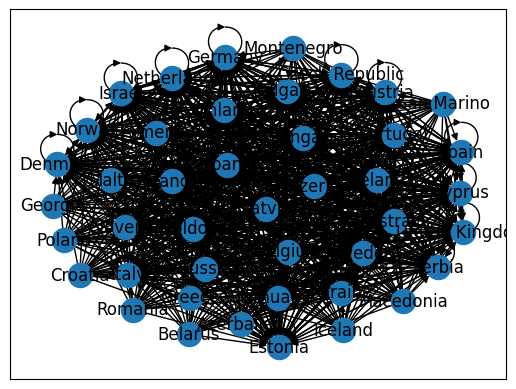

In [ ]:
G = nx.from_pandas_edgelist(votes_melted,
                            source='Source Country',
                            target='Country',
                            edge_attr='points',
                            create_using=nx.DiGraph())

nx.draw_networkx(G)

In [ ]:
countries = pd.read_csv('/content/drive/MyDrive/countries.csv',encoding='latin',index_col='Country')

In [ ]:
countries

,cc2,cc3,numeric,latitude,longitude
Country,,,,,
Afghanistan,AF,AFG,4,33.0000,65.0
Albania,AL,ALB,8,41.0000,20.0
Algeria,DZ,DZA,12,28.0000,3.0
American Samoa,AS,ASM,16,-14.3333,-170.0
Andorra,AD,AND,20,42.5000,1.6
...,...,...,...,...,...
Wallis and Futuna,WF,WLF,876,-13.3000,-176.2
Western Sahara,EH,ESH,732,24.5000,-13.0
Yemen,YE,YEM,887,15.0000,48.0


In [ ]:
pos_geo = {  node:
           ( max(-10,min(countries.loc[node]['longitude'],55)), # fixing scale
             max(countries.loc[node]['latitude'],25)) #fixing scale
               for node in G.nodes()
              }

In [ ]:
for node in G.nodes():
    pos_geo[node] = (max(-10,min(countries.loc[node]['longitude'],55)),
                     max(countries.loc[node]['latitude'],25))

In [ ]:
from colorthief import ColorThief

In [ ]:
flags = {}
flag_color = {}
for node in tqdm.tqdm_notebook(G.nodes()):
    flags[node] = '/content/drive/MyDrive/pycon_social_networkx-master/flags/'+(countries.loc[node]['cc3']).lower().replace(' ','')+'.png'
    flag_color[node] =  ColorThief(flags[node]).get_color(quality=1)


<ipython-input-42-2f6d3aa07045>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for node in tqdm.tqdm_notebook(G.nodes()):


  0%|          | 0/43 [00:00<?, ?it/s]

In [ ]:
def RGB(red,green,blue):
    return '#%02x%02x%02x' % (red,green,blue)

In [ ]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)
plt.show()

In [ ]:
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform


In [ ]:
tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params

In [ ]:
styles = ['dotted','dashdot','dashed','solid'] # line styles

In [ ]:
pos = pos_geo

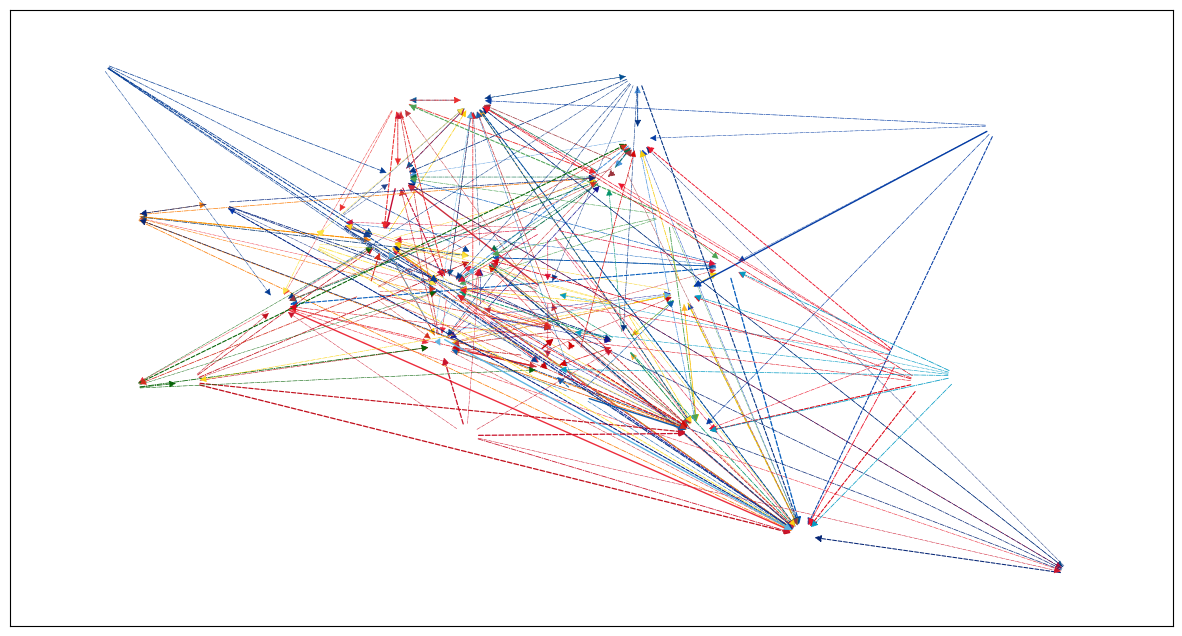

In [ ]:
# draw edges
plt.figure(figsize=(15,8))
for e in G.edges(data=True):
    width = e[2]['points']/24 #normalize by max points
    style=styles[int(width*3)]
    if width>0.3: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style, edge_color = RGB(*flag_color[e[0]]) )
        # in networkx versions >2.1 arrowheads can be adjusted

In [ ]:
#draw nodes
for node in G.nodes():
    imsize = max((0.3*G.in_degree(node,weight='points')
                  /max(dict(G.in_degree(weight='points')).values()))**2,0.03)

    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])

    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates

    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)

fig.savefig('eurovision2018_map.png')

## Information Diffusion

In [ ]:
books = []
for i in range(5):
    books.append(pd.read_csv('/content/drive/MyDrive/pycon_social_networkx-master/data/asoiaf-book{}-edges.csv'.format(i+1)))

In [ ]:
all_books = pd.concat(books)

In [ ]:
all_books.head(15)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0
5,Aemon-Targaryen-(Maester-Aemon),Bowen-Marsh,Undirected,4,1.0
6,Aemon-Targaryen-(Maester-Aemon),Chett,Undirected,9,1.0
7,Aemon-Targaryen-(Maester-Aemon),Clydas,Undirected,5,1.0
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1.0
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1.0


In [ ]:
# we will sum all the books into a single edge between characters

In [ ]:
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()

In [ ]:
edges.sort_values('weight',ascending=False).head()

,Source,Target,weight
1334,Eddard-Stark,Robert-Baratheon,334
2031,Jon-Snow,Samwell-Tarly,228
1965,Joffrey-Baratheon,Sansa-Stark,222
1972,Joffrey-Baratheon,Tyrion-Lannister,219
640,Bran-Stark,Hodor,209


In [ ]:
GOT = nx.from_pandas_edgelist(edges,
                            source='Source',
                            target='Target',
                            edge_attr='weight' )

In [ ]:
weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())

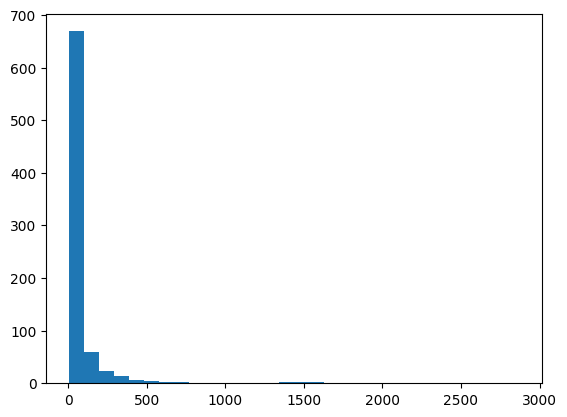

In [ ]:
h = plt.hist(weighted_degrees.values(), bins = 30)

In [ ]:
# Let's focus on the subnetwork of the key characters:

In [ ]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])

In [ ]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)

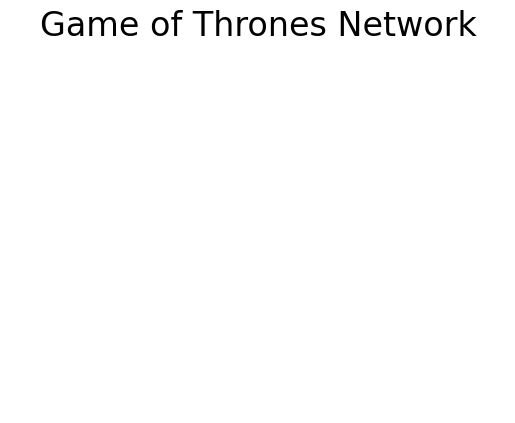

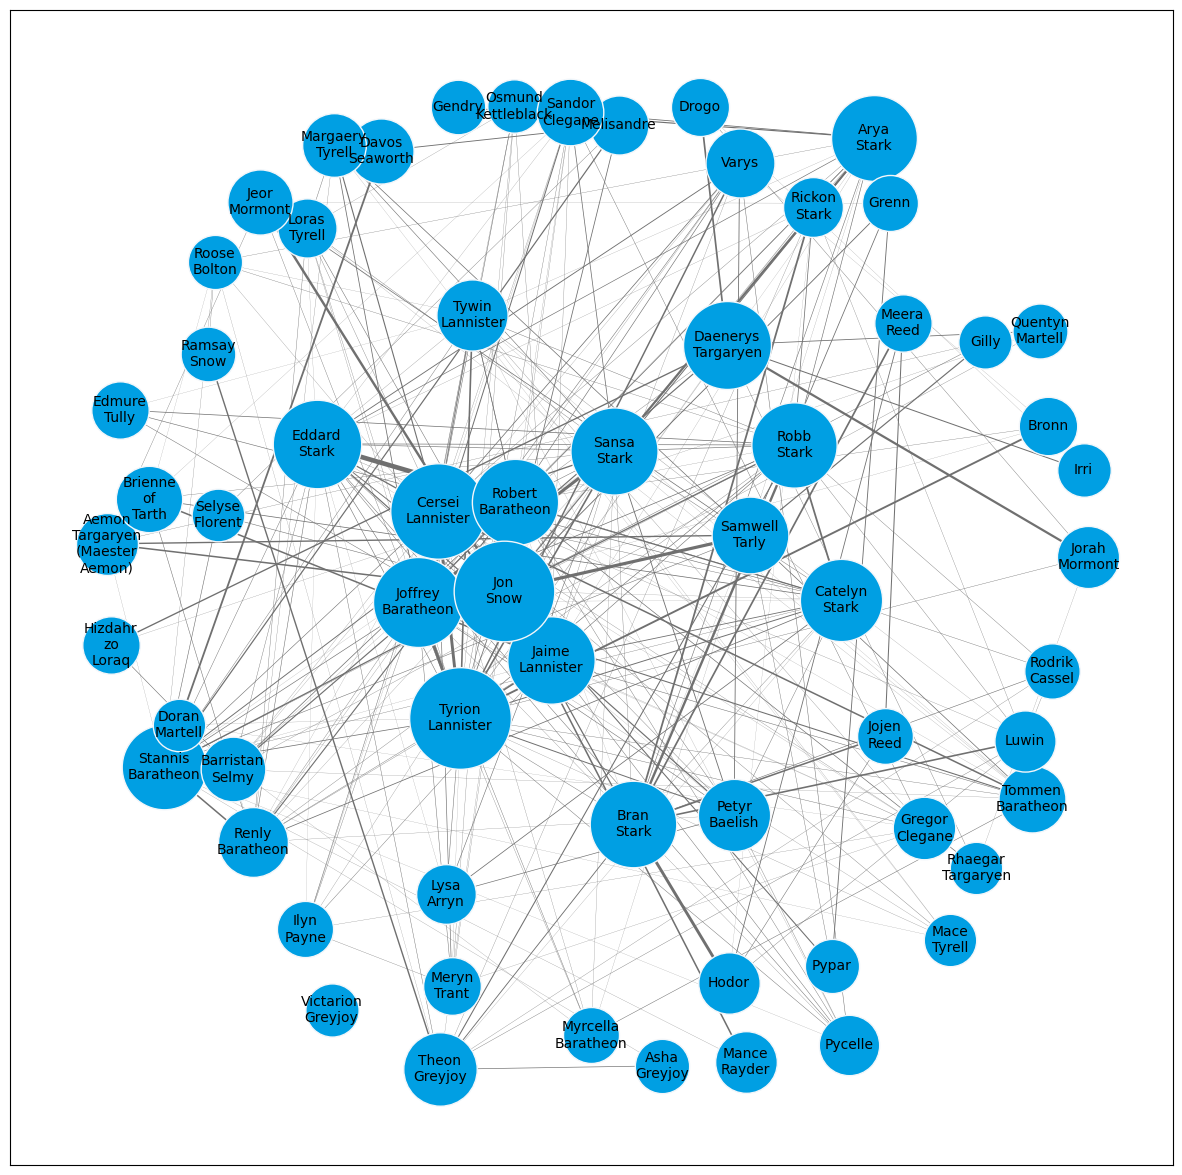

In [ ]:
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 24)
plt.figure(figsize=(15,15))

for node in subG.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

In [ ]:
infection_times = {}

In [ ]:
def independent_cascade(G,t,infection_times):
    #doing a t->t+1 step of independent_cascade simulation
    #each infectious node infects neigbors with probabilty proportional to the weight
    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  G.get_edge_data(n,v)['weight'] >= np.random.random()*max_weight:
                    infection_times[v] = t+1
    return infection_times

In [ ]:
def plot_G(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure()
    plt.axis('off')
    plt.title('Game of Thrones Network, t={}'.format(t),fontsize = 24)

    for node in G.nodes():
        size = 100*weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#feba02')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#f2f6fa')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in G.edges(data=True):
        if e[2]['weight']>10:
            nx.draw_networkx_edges(G,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

In [ ]:
infection_times = {'Bran-Stark':-1,'Samwell-Tarly':-1,'Jon-Snow':0}

<Figure size 1500x1500 with 0 Axes>

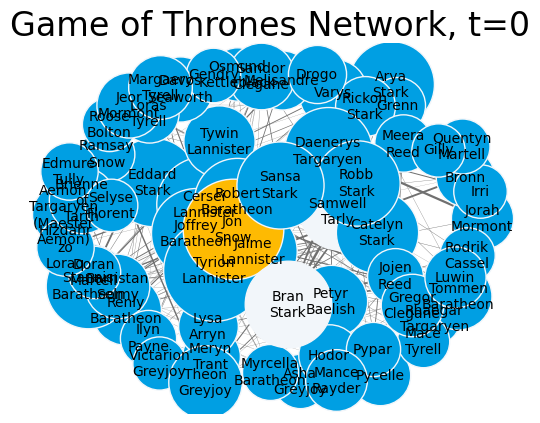

<Figure size 1500x1500 with 0 Axes>

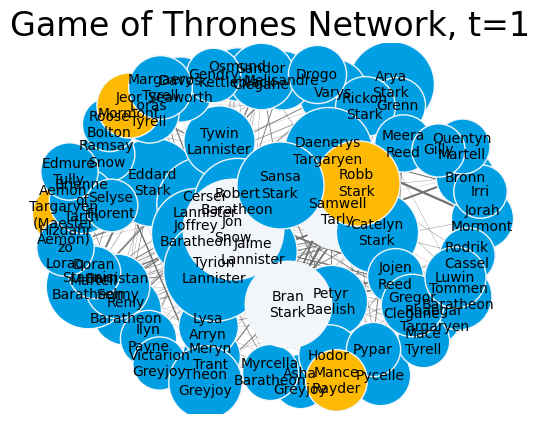

<Figure size 1500x1500 with 0 Axes>

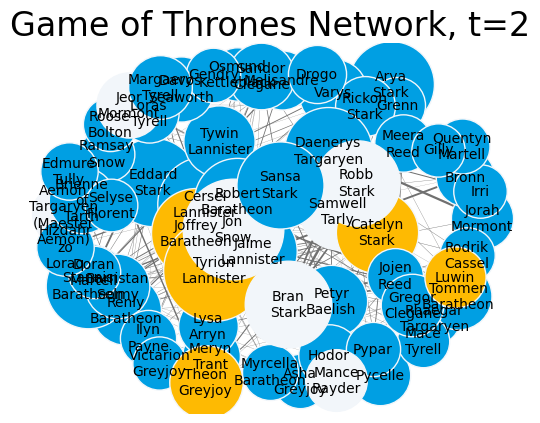

<Figure size 1500x1500 with 0 Axes>

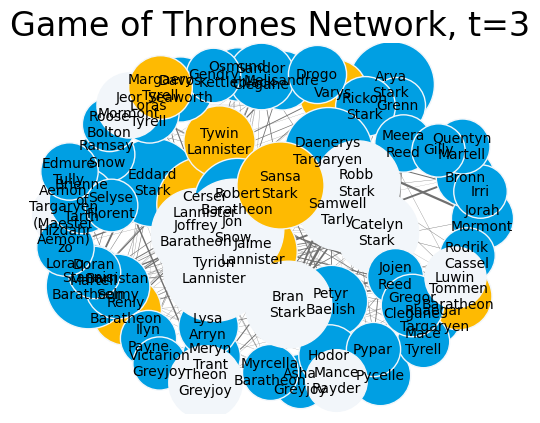

<Figure size 1500x1500 with 0 Axes>

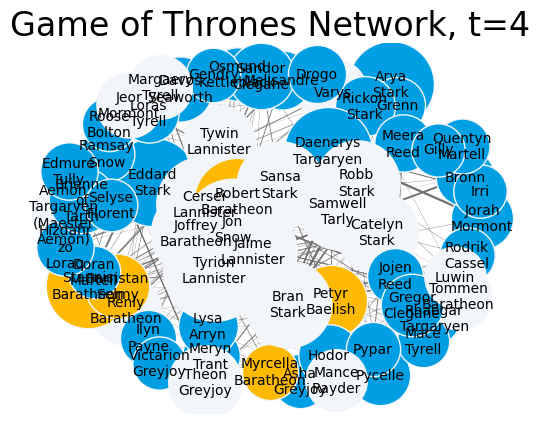

<Figure size 1500x1500 with 0 Axes>

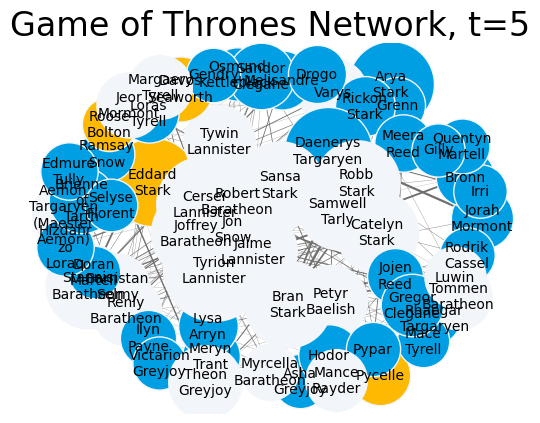

<Figure size 1500x1500 with 0 Axes>

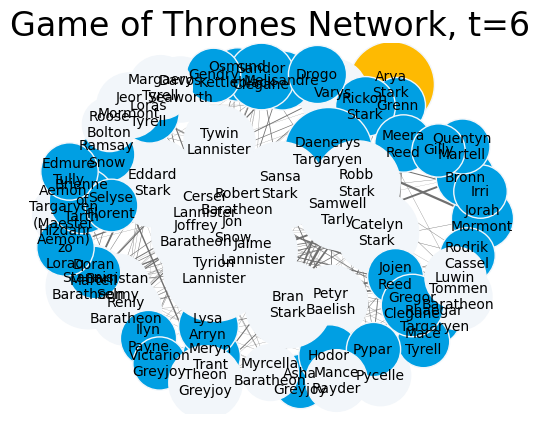

<Figure size 1500x1500 with 0 Axes>

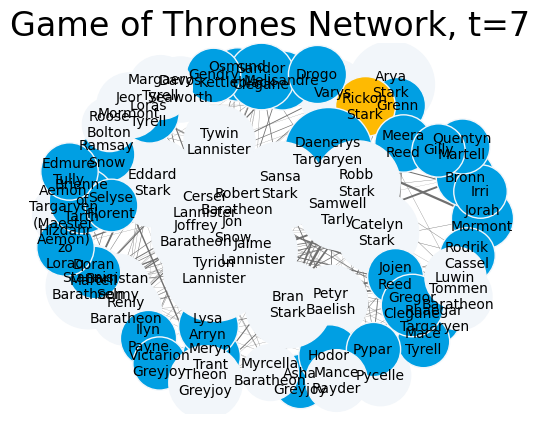

<Figure size 1500x1500 with 0 Axes>

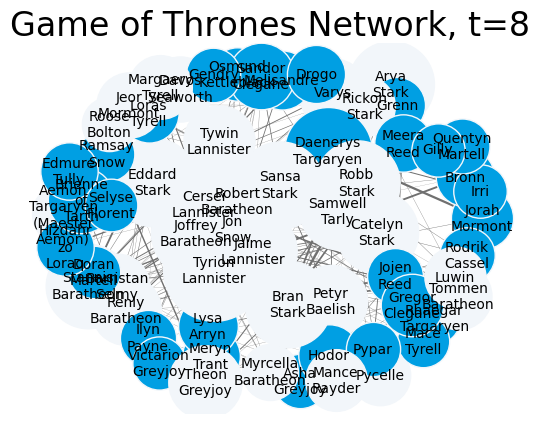

<Figure size 1500x1500 with 0 Axes>

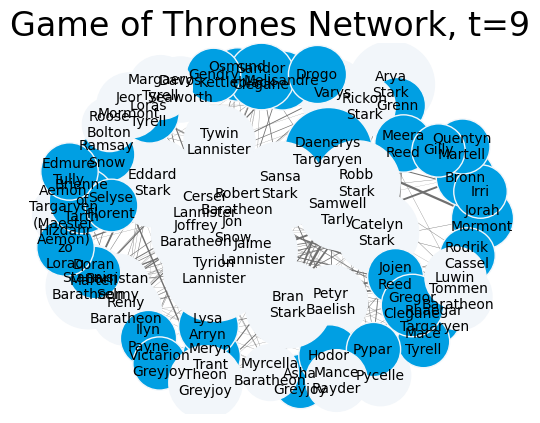

In [ ]:
for t in range(10):
    plt.figure(figsize=(15,15))
    plot_G(subG,pos,infection_times,t)
    infection_times = independent_cascade(subG,t,infection_times)